# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

flats_data - имя датасета для операций

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
flats_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

import matplotlib.pyplot as plt

import matplotlib as mpl

#Посмотрим инфо
flats_data.info()

#Выведем 10 строчек:
print()
print('Первые 10 строчек:')
display(flats_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

##### Разберёмся для начала с данными в следующих столбцах:

1. last_price меняем на int
2. first_day_exposition разобраться со временем - перевести с to_datetime. _Обратим внимание, что время выставления объявления везде 00:00:00_ 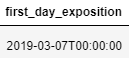
3. floors_total: есть NaN. При этом это не трёхэтажные виллы: 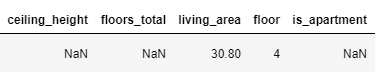
Люди просто не указали количество этажей по какой-то причине. Заменим на медианные значения по населённым пунктам.
4. airports_nearest на int
5. cityCenters_nearest на int
6. parks_around3000 на int
7. parks_nearest на int
8. ponds_around3000 на int
9. ponds_nearest на int
10. days_exposition на int
11. is_apartment имеет три уникальных значения: Nan, True и False. Очевидно, что NaN это просто неотвеченное поле при вывешивании объявления, следовательно, квартира апартаментами не является. Заменим NaN на False.
12. balcony заменяем NaN на нули: очевидно, количество балконов не указано => их нет

*На int меняем числа для сохранения памяти*

Пока (до удаления дупликатов, если есть, имеем 23699 объявлений)

##### Есть множество пропусков. Большинство из них нельзя удалить или дропнуть- клиенты площадки просто не указывали эти данные, что само по себе тоже является данными.

На инт менять большинство пунктов не стал по двум причинам: мы не работаем с этими столбцами + присутствуют NaN, которые пришлось бы удалять или заменять, чтобы перевести числа в целые.



### Шаг 2. Предобработка данных

In [2]:
#Переводим типы данных:
flats_data['last_price'] = flats_data['last_price'].astype('int')
flats_data['first_day_exposition'] = pd.to_datetime(flats_data['first_day_exposition'],
format='%Y.%m.%dT%H:%M:%S')

In [3]:
#Заполняем пустые значения:
flats_data['balcony'] = flats_data['balcony'].fillna(0)
flats_data['is_apartment'] = flats_data['is_apartment'].fillna('False')

#Есть ли апартаменты, которые одновременно студии?
print(flats_data.query('is_apartment == True and studio == True'))
#Таких нет, что хорошо: может пригодиться

#Если days_exposition не указано, значит, публикацию ещё не сняли.


Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


In [4]:
#Разбираемся с количеством этажей: заполняем отсутствующие значения медианным значениям этажности по насёленным пунктам
for i in flats_data['locality_name'].unique():
    med = flats_data.loc[flats_data['locality_name']==i, 'floors_total'].median()
    flats_data.loc[flats_data['locality_name']==i, 'floors_total'] = flats_data.loc[flats_data['locality_name']==i, 'floors_total'].fillna(med)

In [5]:
#Проверяем, остались ли проблемные квартиры:
flats_data[flats_data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8986,10,4850000,103.1,2018-07-10,3,NaN,NaN,68.1,4,False,...,16.7,0.0,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0


Забавно, осталась одна такая квартира- у неё нет города, высоты потолков, и она в 32 километрах от центра СПБ и в 20 км от Пулково. Я не поленился и нашёл две точки, в которых может быть это место: на пересечениях этих двух окружностей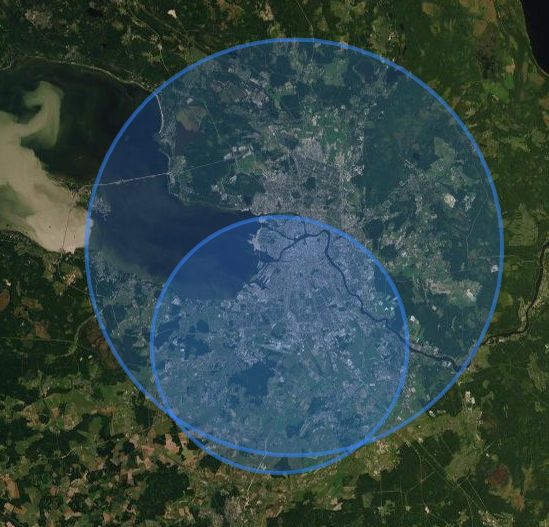

В обеих этих населённых пунктах нет зданий выше 5 этажей, а у нашей квартиры четвёртый этаж, так что смело заменяем total_floors на пять. Никогда ещё типовое строительство в России не давало столько преимуществ начинающим дата-саентистам.

In [6]:
#Заменяем на 5:
flats_data['floors_total'] = flats_data['floors_total'].fillna(5)
#Переведём в int:
flats_data['floors_total'] = flats_data['floors_total'].astype('int')

In [7]:
#Дропнем дупликаты, если есть:
flats_data = flats_data.drop_duplicates().reset_index(drop = True)

In [8]:
flats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

### Вывод

Дупликатов в данных найдено не было. Были логично заполнены пропуски с количеством этажей- очень важная величина для дальнейшего анализа. Дата переведена в тип datetime.



### Шаг 3. Посчитайте и добавьте в таблицу

In [9]:
#Цену квадратного метра:
flats_data['price_meter'] = flats_data['last_price'] / flats_data['total_area']

In [10]:
#день недели, месяц и год публикации объявления:
flats_data['weekday_ex'] = flats_data['first_day_exposition'].dt.weekday
flats_data['month_ex'] = flats_data['first_day_exposition'].dt.month
flats_data['year_ex'] = flats_data['first_day_exposition'].dt.year

In [11]:
#этаж квартиры; варианты — первый, последний, другой:
def floors_rating(data):
    floor = data['floor']
    max_floor = data['floors_total']
    if floor == max_floor:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

flats_data['floor_rate'] = flats_data.apply(floors_rating, axis = 1)

In [12]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей.
flats_data['living_prop'] = flats_data['living_area'] / flats_data['total_area']
flats_data['kitchen_prop'] = flats_data['kitchen_area'] / flats_data['total_area']

In [13]:
flats_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_ex,month_ex,year_ex,floor_rate,living_prop,kitchen_prop
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557


### Вывод

В таблицу были добавлены следующие столбцы: день недели, месяц и год публикации, цена квадратного метра, "рейтинг" этажей и соотношения площадей. Имеются NaN в соотношениях площадей: некоторые пользователи площадки не указывали площади в своих квартирах.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### A) Площадь, цена, число комнат, высота потолков. Гистограммы для каждого параметра.

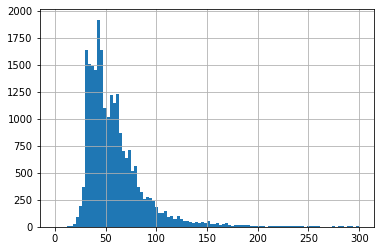

In [14]:
#Площадь

flats_data['total_area'].hist(bins = 100, range = [0, 300])

Распределение похоже на Пуассоновское, что достаточно справедливо. Необычное падение в районе 50 кв. метров может быть вызвано "типичностью" советской застройки. Хрущёвок 50 квадратов площадью просто нет. https://centermira.ru/blog/plan-trehkomnatnoj-kvartiry-v-hrucshevke-s-razmerami.html


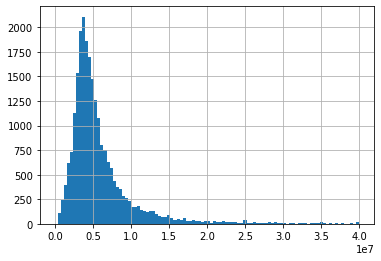

In [15]:
#Цена

flats_data['last_price'].hist(bins = 100, range = [0, 40000000])

Распределение выглядит очень правдоподобно и радует глаз. Хорошо, что сильных "выбросов" у цен нет.

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


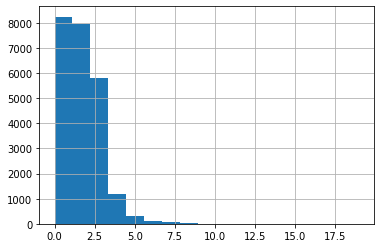

In [16]:
#Число комнат

print(flats_data['rooms'].unique())

flats_data['rooms'].hist(bins = 17, range = [0, 19])

Есть единичные случаи с 15, 19, 16 комнатами, которые не выглядят правдоподобно. Хотя это и могут быть пентхаусы. Сколько таких объявлений всего?

In [17]:
print(flats_data.groupby('rooms')['last_price'].count())

rooms
0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: last_price, dtype: int64


Посмотрим на квартиры с большим числом комнат ближе:

In [18]:
flats_data.query('rooms > 9').head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_ex,month_ex,year_ex,floor_rate,living_prop,kitchen_prop
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0.0,NaN,NaN,95264.017420,6,7,2018,последний,0.755580,0.072401
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,2.0,435.0,418.0,68870.523416,5,12,2017,другой,0.611570,0.045730
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,...,1.0,531.0,NaN,84372.707263,3,1,2018,последний,0.535216,0.068966
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0.0,NaN,14.0,110169.491525,3,2,2019,другой,0.693220,0.169492
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,2.0,66.0,813.0,170015.455951,1,2,2017,другой,0.664606,0.061309
14498,6,32250000,374.6,2018-06-09,19,NaN,5,264.5,2,False,...,2.0,548.0,114.0,86091.831287,5,6,2018,другой,0.706086,0.073679
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,...,0.0,NaN,11.0,71726.052753,0,7,2016,другой,0.746876,0.091624
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0.0,NaN,1365.0,105555.555556,0,3,2015,последний,0.666667,0.048148
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,...,1.0,227.0,77.0,137931.034483,1,6,2016,последний,0.653103,0.103448
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2.0,318.0,106.0,466666.666667,2,12,2017,последний,0.455222,0.124444


Выбрасывать эти квартиры точно нельзя. Нормальные объявления, правдоподобные. Но что с нулём комнат в объявлениях?

In [19]:
flats_data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_ex,month_ex,year_ex,floor_rate,living_prop,kitchen_prop
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,NaN,181.0,90740.740741,3,3,2017,другой,0.574074,NaN
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,NaN,NaN,45.0,92800.000000,2,9,2017,первый,0.680000,NaN
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,2.0,982.0,64.0,91479.158982,0,3,2018,другой,0.912947,NaN
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,1.0,593.0,430.0,98110.465116,1,3,2017,другой,0.706395,NaN
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,NaN,29.0,74000.000000,2,2,2019,другой,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,1.0,623.0,14.0,123076.923077,4,9,2017,другой,0.692308,NaN
23442,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,...,NaN,NaN,4.0,90252.707581,3,9,2017,другой,0.649819,NaN
23554,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,...,2.0,112.0,31.0,128846.153846,4,9,2018,другой,NaN,NaN
23592,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,...,NaN,NaN,82.0,50000.000000,5,11,2017,другой,0.620690,NaN


In [20]:
flats_data.query('rooms == 0 and studio == True')['last_price'].count()

138

In [21]:
#Присвоим значение "studio" 59 квартирам с нулём комнат.
flats_data.loc[flats_data['rooms'] == 0, 'studio'] = True

In [22]:
#Проверка
flats_data.query('rooms == 0 and studio == True')['last_price'].count()

197

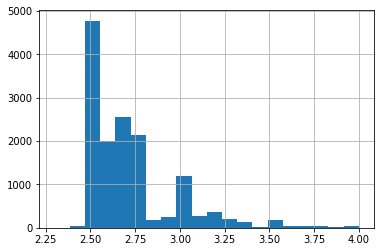

In [23]:


#Заменим аномально низкие и высокие значения на средние по стране- 2,7 (Я студент строительного)
flats_data.loc[(flats_data['ceiling_height'] > 4) | (flats_data['ceiling_height'] < 2.4), 'ceiling_height'] = 2.7

#Высота потолков

flats_data['ceiling_height'].hist(bins = 20, range = [2.3 , 4])

#### Микровывод

Были изучены четыре параметра датасета: площадь, цена, число комнат, высота потолков. Построены гистограммы для каждого параметра. В площадях и высотах потолков нам помогает типовость советской застройки: ей можно объяснить иногда странное преобладание квартир с определённой площадью, она же помогает отбросить неверные значения высот потолков.

Пустые значения лучше не заполнять- если пользователь площадки их не заполнил, значит, предполагаемый покупатель должен это знать. Отсутствие значения тут- тоже значение.

#### B) Изучите время продажи квартиры. 

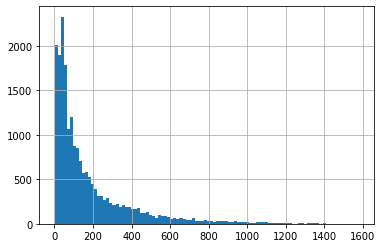

In [24]:
flats_data['days_exposition'].hist(bins = 100)

Сразу бросается в глаза огромное количество значений с крайне низкими значениями в days_exposition. Гениальные риелторы или "грязные" данные?

P.S. Очевидно, что тут NaN нужно оставлять - это значит, что недвижимость всё ещё продаётся. Остаётся 20518 значений.

In [25]:
flats_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Микровывод

Среднее число присутствия объявления на доске - полгода. При этом половина пользователей успевает продать квартиру в два раза быстрее- за три месяца.

По скачку на гистрограмме можно сказать в районе 100 дней, что квартира была продана быстро - то есть быстрым можно считать всё, что меньше медианы. При этом необычайно быстрыми можно считать всю группу значений до месяца.

Некоторые квартиры продаются по несколько лет, а объявления, провисевшие более трёх лет, вообще вызывают вопросы.

Но я не могу сказать, что это какие-то особенные значения. Объявление вполне может несколько лет висеть на сайте. На твоё предложение может легко не найтись спроса. Аномалий не обнаружено.

#### C) Какие факторы больше всего влияют на стоимость квартиры?

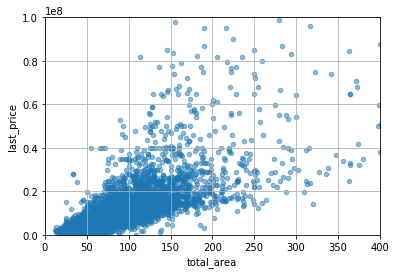

In [26]:
# Зависит ли цена от квадратного метра:

flats_data.plot(x='total_area', y='last_price', grid = True, kind = 'scatter', xlim =(0, 400), ylim=(0, 100000000), alpha = 0.5 )


На очевидный вопрос- очевидный ответ. Естественно, чем больше метраж, тем, в целом, будет больше и стоимость. Даже несмотря на разное местоположение, этажность, качество жилищ, в целом всё равно чем больше квартира, тем она дороже.

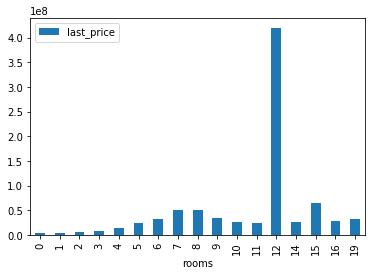

In [27]:
#Зависит ли цена от числа комнат? Посмотрим на среднюю цену по каждому значению количества комнат.

flats_data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

Сразу виден неадекватный выброс стоимости для 12 комнат. Напоминаю, что вот так выглядят все квартиры от 9 комнат:

In [28]:
flats_data.query('rooms > 9').head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_ex,month_ex,year_ex,floor_rate,living_prop,kitchen_prop
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0.0,NaN,NaN,95264.017420,6,7,2018,последний,0.755580,0.072401
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,2.0,435.0,418.0,68870.523416,5,12,2017,другой,0.611570,0.045730
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,...,1.0,531.0,NaN,84372.707263,3,1,2018,последний,0.535216,0.068966
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0.0,NaN,14.0,110169.491525,3,2,2019,другой,0.693220,0.169492
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,2.0,66.0,813.0,170015.455951,1,2,2017,другой,0.664606,0.061309
14498,6,32250000,374.6,2018-06-09,19,NaN,5,264.5,2,False,...,2.0,548.0,114.0,86091.831287,5,6,2018,другой,0.706086,0.073679
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,...,0.0,NaN,11.0,71726.052753,0,7,2016,другой,0.746876,0.091624
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0.0,NaN,1365.0,105555.555556,0,3,2015,последний,0.666667,0.048148
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,...,1.0,227.0,77.0,137931.034483,1,6,2016,последний,0.653103,0.103448
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2.0,318.0,106.0,466666.666667,2,12,2017,последний,0.455222,0.124444


Эта квартира с 12 комнатами имеет самый большой метраж и стоимость. Похоже, что это элитный пентхаус на 25 этаже 25 этажного здания в СПБ. Но ничего нереального, опять-таки, нет. Я не могу удалить эти необычные строки. Но их слишком мало чтобы отслеживать закономерности.

Однако, возвращаясь к вопросу, если смотреть на квартиры с привычным числом комнат, скажем, до шести, зависимость будет явной и очевидной: больше комнат- больше цена. Таких квартир много и, смотря на такой график, можно чётко видеть зависимость.

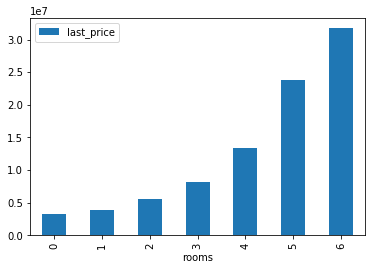

In [29]:
flats_data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'mean').query('rooms <= 6').plot(kind = 'bar')

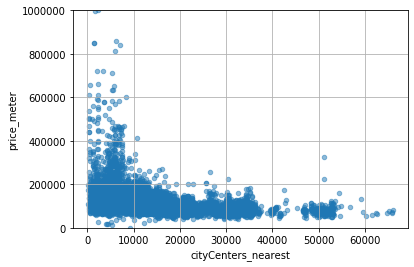

In [30]:
#Зависимость стоимости от удалённости от центра.

flats_data.plot(x='cityCenters_nearest', y='price_meter', grid = True, kind = 'scatter', ylim=(0, 1000000), alpha = 0.5 )


Здесь явно лучше считать зависимость стоимости квадратного метра, а не всей квартиры. Заметна гиперболическая зависимость.

In [31]:
#Зависимость стоимости от положения этажа: первый, последний, другой:

floors_corr = flats_data.pivot_table(index = 'floor_rate', values = 'price_meter')
floors_corr

,price_meter
floor_rate,
другой,103486.256448
первый,82296.093176
последний,93074.787499


In [32]:
# Зависимость от даты размещения:

# Месяц
month_corr = flats_data.pivot_table(index = 'month_ex', values = 'price_meter', aggfunc = 'median')
month_corr

,price_meter
month_ex,
1,95222.437478
2,95000.000000
3,95238.095238
4,96451.612903
5,92857.142857
6,92799.539171
7,95000.000000
8,96026.315789
9,95607.235142


In [33]:
# Год
year_corr = flats_data.pivot_table(index = 'year_ex', values = 'price_meter', aggfunc = 'median')
year_corr

,price_meter
year_ex,
2014,107000.000000
2015,93414.634146
2016,91743.119266
2017,92565.088448
2018,95689.655172
2019,103305.785124


In [34]:
# День недели
weekday_ex = flats_data.pivot_table(index = 'weekday_ex', values = 'price_meter', aggfunc = 'median')
weekday_ex

,price_meter
weekday_ex,
0,94688.910380
1,95634.095634
2,95473.807179
3,95143.884892
4,94616.160238
5,93545.716727
6,94501.718213


#### Микровывод

Были выявлены очевидные и неочевидные зависимости: Так:
- квартира тем дороже, чем больше метраж
- тем дороже, чем ближе к центру города
- тем дороже, чем больше в ней комнат
- самые дорогие квартиры выставляются на продажу в апреле и в начале осени: может, это как-то связано с свадьбами? Или возвращениями с отпусков?
- самые дорогие квартиры выставляются в середине недели.
- В 2014 стоимость квартир была заметно выше, чем в последующих годах. В 2019 опять начался рост стоимости.

Там, где это было логично, считал не стоимость квартир, а стоимость квадратного метра. (price_meter вместо last_price)

#### D) Выберите 10 населённых пунктов с наибольшим числом объявлений....

In [59]:
#Десять наибольших:
ten_best = flats_data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = ['count', 'mean'] )
ten_best.columns = ['count', 'price']
ten_best.sort_values(by = 'count', ascending = False).head(10)


,count,price
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


#### Микровывод:

Самые дорогие квартиры действительно в среднем находятся в СПБ. Независимо от выбросов и артефактов.

Самое недорогое жильё из топ-10 по кол-ву объявлений можно найти в Всеволожске и Гатчине, а замыкает тройку дешевых Выборг.

#### E) Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге

In [36]:
import numpy as np
#Выбираем только квартиры в СПБ
spb_flats = flats_data.query('locality_name == "Санкт-Петербург"')



In [63]:
# округляем и переводим в километры.
ausf =  (spb_flats.loc[:, 'cityCenters_nearest'].round() / 1000).round()
spb_flats.loc[:, 'distance'] = ausf



In [64]:
# Сводная таблица для построения графика (цена(расстояние))
grapho_spb = spb_flats.pivot_table(index = 'distance', values = 'price_meter', aggfunc = 'mean')

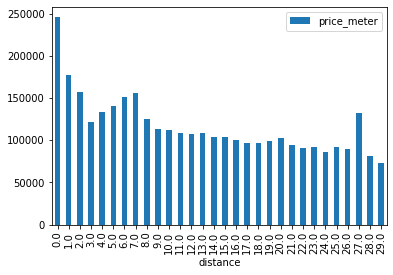

In [65]:
grapho_spb.plot(kind='bar')

#### Микровывод:

Заметен резкий спад цен на восьмом километре удалённости от центра (и дальше), после которого идёт постепенный спад цены. Значит, центр- это радиус семи-восьми километров.

#### F) Выделите сегмент квартир в центре...

In [66]:
#Выделяем всё в СПБ в радиусе округлённых 7 км.
center_spb = spb_flats.query('distance <= 7')
center_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,weekday_ex,month_ex,year_ex,floor_rate,living_prop,kitchen_prop,distance
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN,7.0
24,8,6500000,97.2,2015-10-31,2,NaN,3,46.5,1,False,...,124.0,265.0,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
35,6,15500000,149.0,2017-06-26,5,NaN,5,104.0,4,False,...,779.0,644.0,104026.845638,0,6,2017,другой,0.697987,0.114094,4.0
51,7,45000000,161.0,2017-10-17,3,3.2,8,38.0,4,False,...,99.0,541.0,279503.105590,1,10,2017,другой,0.236025,0.310559,7.0
52,20,11795000,136.0,2017-09-22,6,3.0,2,94.0,2,False,...,NaN,NaN,86727.941176,4,9,2017,последний,0.691176,0.080882,7.0


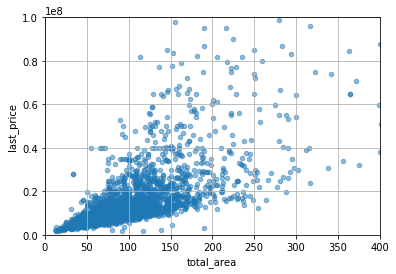

In [67]:
# Изучим площадь квартир и зависимость цены от площади
center_spb.plot(x='total_area', y='last_price', grid = True, kind = 'scatter', xlim =(0, 400), ylim=(0, 100000000), alpha = 0.5 )


В центре больше элитного жилья - гораздо больше выбивающихся точек. В целом, зависимость всё равно та же: чем больше площадь, тем больше цена.

Медианная площадь в центре города выше, чем медианная площадь в городе в целом.

In [68]:
print('медианная площадь в радиусе 7 км:', center_spb['total_area'].median())
print('медианная площадь в СПБ', spb_flats['total_area'].median())
print('медианная площадь в СПБ и области', flats_data['total_area'].median())

медианная площадь в радиусе 7 км: 78.7
медианная площадь в СПБ 55.0
медианная площадь в СПБ и области 52.0


Медианная площадь в СПБ и области полностью совпадает с типовой площадью Хрущёвки.

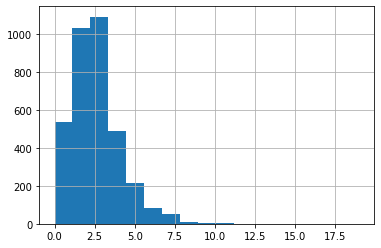

In [69]:
#Посмотрим на распределение по числу комнат в квартирах в центре:

center_spb['rooms'].hist(bins = 17, range = (0,19))

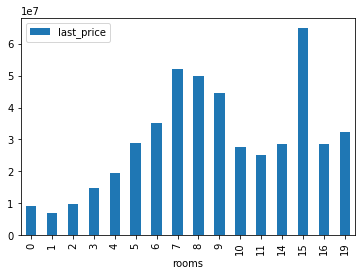

In [70]:
#Зависит ли цена от числа комнат? Посмотрим на среднюю цену по каждому значению количества комнат.

center_spb.pivot_table(index='rooms', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

In [71]:
print('медианное количество комнат во центре СПБ', center_spb['rooms'].median())
print('медианное количество комнат во всем СПБ', spb_flats['rooms'].median())
print('медианное количество комнат во всем регионе', flats_data['rooms'].median())

медианное количество комнат во центре СПБ 3.0
медианное количество комнат во всем СПБ 2.0
медианное количество комнат во всем регионе 2.0


Не вижу ничего радикального в таком распределении цен по количеству комнат. Всё логично и понятно. Единственная интересная разница- студии (0 комнат) в центре стоят дороже однушек.

Однако в целом (не рассматривая только центр) средняя однушка дороже средней студии: вот таблица квартир до шести комнат из всего датасета.

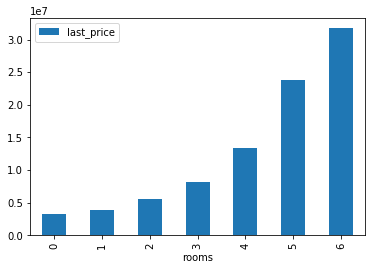

In [72]:
flats_data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'mean').query('rooms <= 6').plot(kind = 'bar')

Опять-таки, адекватно рассматривать многокомнатные (больше шести) предложения невозможно из-за слишком маленькой выборки и особенностей рынка элитного жилья.

In [73]:
#По высоте потолков:
print('медианная высота потолков в центре СПБ', center_spb['ceiling_height'].median())
print('медианная высота потолков в всём СПБ', spb_flats['ceiling_height'].median())
print('медианная высота потолков в всём датасете', flats_data['ceiling_height'].median())
print('разница налицо')

медианная высота потолков в центре СПБ 3.0
медианная высота потолков в всём СПБ 2.7
медианная высота потолков в всём датасете 2.65
разница налицо


Та же корреляция будет и на стоимости - это можно было понять ещё из пункта 4(C), где мы смотрели зависимость стоимости метра от удалённости от центра.

In [74]:
print('медианная стоимость квадратного метра квартиры в центре СПБ', center_spb['price_meter'].median())
print('медианная стоимость квадрата в всём СПБ', spb_flats['price_meter'].median())
print('медианная стоимость квадратного метра среди СПБ и области', flats_data['price_meter'].median())

медианная стоимость квадратного метра квартиры в центре СПБ 123622.04724409449
медианная стоимость квадрата в всём СПБ 104761.90476190476
медианная стоимость квадратного метра среди СПБ и области 95000.0


Что же с зависимостью цен квартир в центре спб от времени продажи?

In [75]:
# Месяц
month_corr_spb = center_spb.pivot_table(index = 'month_ex', values = 'price_meter', aggfunc = 'median')
month_corr_spb

,price_meter
month_ex,
1,129334.850567
2,121355.287326
3,130555.555556
4,126884.920635
5,124615.384615
6,120138.592499
7,118891.465647
8,125241.312741
9,123853.211009


In [76]:
# Год
year_corr_spb = center_spb.pivot_table(index = 'year_ex', values = 'price_meter', aggfunc = 'median')
year_corr_spb

,price_meter
year_ex,
2014,143465.553236
2015,118915.006766
2016,118809.047961
2017,121580.547112
2018,124746.134021
2019,135450.268817


In [77]:
# День недели
weekday_ex_spb = center_spb.pivot_table(index = 'weekday_ex', values = 'price_meter', aggfunc = 'median')
weekday_ex_spb

,price_meter
weekday_ex,
0,126033.478261
1,119934.067050
2,124590.163934
3,120879.120879
4,124861.085502
5,129166.666667
6,130388.552480


#### Микровывод:

Рыночные законы в центре города действуют в целом так же, как и во всём регионе:
- Чем больше площадь и количество комнат, тем больше цена
- В апреле и начале осени квартиры стоят дороже
- В 2014 они стояли дороже всего, сейчас снова рост цен

##### А вот с днём недели произошла разница: самые дорогие квартиры- в конце недели, самые дешёвые- в середине. В целом по региону ситуация обратная.

Квартиры в центре, естественно, дороже по медиане. Также в центре в среднем выше потолки и больше комнат.

In [78]:
# (стоимость квартир по дням недели В целом по региону:)
weekday_ex

,price_meter
weekday_ex,
0,94688.910380
1,95634.095634
2,95473.807179
3,95143.884892
4,94616.160238
5,93545.716727
6,94501.718213


### Шаг 5. Общий вывод

В нашем распоряжении оказались данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно было научиться определять рыночную стоимость объектов недвижимости. Ваша задача заключалась в установлении параметров. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

##### Есть множество пропусков. Большинство из них нельзя удалить или дропнуть- клиенты площадки просто не указывали эти данные, что само по себе тоже является данными.

На инт менять большинство пунктов не стал по двум причинам: мы не работаем с этими столбцами + присутствуют NaN, которые пришлось бы удалять или заменять, чтобы перевести числа в целые.

Дупликатов в данных найдено не было. Были логично заполнены пропуски с количеством этажей- очень важная величина для дальнейшего анализа. Дата переведена в тип datetime.

#### Добавления в таблицу:

В таблицу были добавлены следующие столбцы: день недели, месяц и год публикации, цена квадратного метра, "рейтинг" этажей и соотношения площадей. Имеются NaN в соотношениях площадей: некоторые пользователи площадки не указывали площади в своих квартирах.


#### Анализ:

Были выявлены очевидные и неочевидные зависимости: Так:

- квартира тем дороже, чем больше метраж
- тем дороже, чем ближе к центру города
- тем дороже, чем больше в ней комнат
- самые дорогие квартиры выставляются на продажу в апреле и в начале осени: может, это как-то связано с свадьбами? Или возвращениями с отпусков?
- самые дорогие квартиры выставляются в середине недели.
- В 2014 стоимость квартир была заметно выше, чем в последующих годах. В 2019 опять начался рост стоимости.

Там, где это было логично, считал не стоимость квартир, а стоимость квадратного метра. (price_meter вместо last_price)

#### При этом в центре города:

Рыночные законы в центре города действуют в целом так же, как и во всём регионе:

- Чем больше площадь и количество комнат, тем больше цена
- В апреле и начале осени квартиры стоят дороже
- В 2014 они стояли дороже всего, сейчас снова рост цен
- А вот с днём недели произошла разница: самые дорогие квартиры- в конце недели, самые дешёвые- в середине. В целом по региону ситуация обратная.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили." 
## Я боюсь выбрасывать редкие и выбивающиеся значения, потому что они не кажутся мне неправдоподобными. Мне нужна маленькая помощь здесь
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод